In [1]:
import ast
from dateutil.parser import parse as to_datetime
from datetime import timedelta
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
path_lp = 'G:\\PreEpiSeizures\\Patients_HSM'

path_ep = 'G:\\PreEpiSeizures\\Patients_HEM'

table = pd.DataFrame(columns=['patient', 'source', '#files', 'duration'])

In [10]:
def aux_date(header):
    """
    Get starting time from header
    """
    time_key = [key for key in header.keys() if 'time' in key][0]

    try:
        return to_datetime(header['date'].strip('\"') + ' ' + header[time_key].strip('\"'))
    except Exception as e:
        print(e)


def count_bit_files(patient, dir, source):
    # count number of files in a directory
    # add also the filesize
    dir_bit = os.path.join(dir, patient, 'Bitalino')
    files = [file for file in os.listdir(dir_bit) if file.startswith('A2')]
    print(patient)
    file_dur = timedelta(seconds=0)
    for file in files:
        dirfile = os.path.join(dir_bit, file)
        with open(dirfile) as fh:
            next(fh)
            header = next(fh)[2:]
            next(fh)
            file_len = np.sum([1 for line in fh])
        header = ast.literal_eval(header)
        if len(header.keys()) <= 2:
            device = list(header.keys())[0]
            header = header[device]
        file_dur += timedelta(seconds=file_len/header['sampling rate'])
    print(file_dur)

    return {'patient': patient, 'source': source, '#files': len(files), 'duration': file_dur}

In [11]:
for patient in os.listdir(path_lp):
    new_row = {}
    try:
        new_row = count_bit_files(patient, path_lp, 'laptop')
    except:
        print('Error', patient)
    if new_row != {}:
        table = pd.concat((table, pd.DataFrame(new_row, index=[0])), ignore_index=True)
table.to_csv('C:\\Users\\Mariana\\PycharmProjects\\IT-LongTermBiosignals\\research_journal\\19-09-2022\\table_laptop.csv')

for patient in os.listdir(path_ep):
    new_row = {}
    try:
        new_row = count_bit_files(patient, path_ep, 'epibox')
    except:
        print('Error', patient)
    if new_row != {}:
        table = pd.concat((table, pd.DataFrame(new_row, index=[0])), ignore_index=True)
table.to_csv('C:\\Users\\Mariana\\PycharmProjects\\IT-LongTermBiosignals\\research_journal\\19-09-2022\\table_epibox.csv')

Error Nota de alta V-PSG template.dotx
Error Nota de alta VEEG template.dotx
Error eeg_ist
Patient1
8:49:06
Patient100
3 days, 4:47:01.500000
Patient101
1 day, 19:21:49.823000
Patient102
1 day, 23:41:59.600000
Patient103
2 days, 7:19:31.300000
Patient104
2 days, 8:16:44.900000
Patient105
1 day, 20:51:19.200000
Patient106
9:26:34.400000
Patient107
1 day, 19:21:27.500000
Patient108
1 day, 15:42:05.951000
Patient109
1 day, 10:22:40.200000
Error Patient110
Patient111
2 days, 10:51:59.700000
Patient112
Error Patient112
Patient2
0:23:36
Patient4
1:29:51
Error Novos
Error CloudStation
Error pat_8_3_2021
Error videos
Error A2009-03-04 21-06-56.txt
Error drift_log_file_2009-03-04 21-06-56.txt
Error teste_casa
Patient200
Error Patient200
Error Patient201
Error Patient202
Error Patient204
Error Miguel_25_11_2019
Error ~$Patients_HSM_.xlsx
Error Patient203
Error Patient205
Error Patient206
Patient207
0:00:00.900000
Patient208
Error Patient208
Error Patient209
hsm_joao
3 days, 18:46:21.242000
Error

In [73]:
table_lp = pd.read_csv('C:\\Users\\Mariana\\PycharmProjects\\IT-LongTermBiosignals\\research_journal\\19-09-2022\\table_laptop.csv', index_col=0)
table_ep = pd.read_csv('C:\\Users\\Mariana\\PycharmProjects\\IT-LongTermBiosignals\\research_journal\\19-09-2022\\table_epibox.csv', index_col=0)

In [74]:
table_ep

,patient,source,#files,duration
0,Patient102,laptop,972,1 days 23:41:59.600000
1,Patient1,laptop,336,0 days 08:49:06
2,Patient100,laptop,379,3 days 04:47:01.500000
3,Patient101,laptop,505,1 days 19:21:49.823000
4,Patient102,laptop,972,1 days 23:41:59.600000
5,Patient103,laptop,2578,2 days 07:19:31.300000
6,Patient104,laptop,2452,2 days 08:16:44.900000
7,Patient105,laptop,1911,1 days 20:51:19.200000
8,Patient106,laptop,1323,0 days 09:26:34.400000
9,Patient107,laptop,1161,1 days 19:21:27.500000


In [81]:
list_patients = ['Patient100', 'Patient101', 'Patient102', 'Patient103', 'Patient104', 'Patient105', 'Patient107', 'Patient108', 'Patient109', 'Patient111']
table_lp = table_lp.loc[table_lp['patient'].isin(list_patients)].drop_duplicates()
table_lp

,patient,source,#files,duration
0,Patient102,laptop,972,1 days 23:41:59.600000
2,Patient100,laptop,379,3 days 04:47:01.500000
3,Patient101,laptop,505,1 days 19:21:49.823000
5,Patient103,laptop,2578,2 days 07:19:31.300000
6,Patient104,laptop,2452,2 days 08:16:44.900000
7,Patient105,laptop,1911,1 days 20:51:19.200000
9,Patient107,laptop,1161,1 days 19:21:27.500000
22,Patient108,laptop,1128,1 days 15:42:05.951000
23,Patient109,laptop,1264,1 days 10:22:40.200000
24,Patient111,laptop,544,2 days 10:51:59.700000


In [82]:
list_patients_ep = ['FCSFDM', 'FLRB', 'AMRL', 'DAGN', 'DAJRD', 'MARG', 'NC', 'TASL', 'TSSVAS', 'JFPS']
table_ep = table_ep.loc[table_ep['patient'].isin(list_patients_ep)]

In [83]:
table_ep

,patient,source,#files,duration,ratio
30,FCSFDM,epibox,200,3 days 10:27:22.089000,1.484210
31,FLRB,epibox,93,1 days 03:01:34.600000,1.046178
32,AMRL,epibox,264,3 days 09:35:35.800000,1.112636
33,DAGN,epibox,186,2 days 13:53:03.900000,1.197763
34,DAJRD,epibox,95,1 days 10:55:48.500000,1.323668
35,MARG,epibox,113,2 days 12:10:04.401000,1.916853
36,NC,epibox,97,1 days 07:10:02.600000,1.156728
37,JFPS,epibox,1695,0 days 15:09:41.200000,0.032201
39,TASL,epibox,4743,1 days 02:43:42.200000,0.020287
40,TSSVAS,epibox,28,1 days 00:37:43.900000,3.166568


In [133]:
new_col_ep, new_col_lp = [], []
order_ep, order_lp = [], []
for row in range(10):
    print('------------------')
    order_ep += [row]
    order_lp += [row]
    new_col_ep += [1/((pd.Timedelta(table_ep['duration'].iloc[row]).total_seconds()/3600)/(int(table_ep['#files'].iloc[row])))]
    new_col_lp += [1/((pd.Timedelta(table_lp['duration'].iloc[row]).total_seconds()/3600)/(int(table_lp['#files'].iloc[row])))]

------------------
------------------
------------------
------------------
------------------
------------------
------------------
------------------
------------------
------------------


In [134]:
pd.Timedelta(table_ep['duration'].iloc[row]).total_seconds()/60

1477.7316666666666

In [127]:
pd.Timedelta(table_ep['duration'].iloc[row]).total_seconds()/60

1477.7316666666666

In [135]:
table_ep['ratio'] = new_col_ep
table_lp['ratio'] = new_col_lp
table_ep['order'] = order_ep
table_lp['order'] = order_lp

In [137]:
table_ep

,patient,source,#files,duration,ratio,order
30,FCSFDM,epibox,200,3 days 10:27:22.089000,2.425532,0
31,FLRB,epibox,93,1 days 03:01:34.600000,3.441095,1
32,AMRL,epibox,264,3 days 09:35:35.800000,3.235561,2
33,DAGN,epibox,186,2 days 13:53:03.900000,3.005603,3
34,DAJRD,epibox,95,1 days 10:55:48.500000,2.719714,4
35,MARG,epibox,113,2 days 12:10:04.401000,1.878078,5
36,NC,epibox,97,1 days 07:10:02.600000,3.112227,6
37,JFPS,epibox,1695,0 days 15:09:41.200000,111.796736,7
39,TASL,epibox,4743,1 days 02:43:42.200000,177.451773,8
40,TSSVAS,epibox,28,1 days 00:37:43.900000,1.136878,9


<AxesSubplot:xlabel='order', ylabel='ratio'>

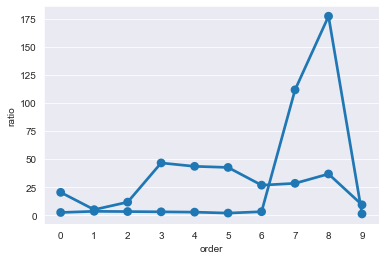

In [138]:
sns.pointplot(data=table_lp, y= 'ratio', x='order')
sns.pointplot(data=table_ep, y= 'ratio', x='order')

In [140]:
table_all = pd.concat((table_ep, table_lp))

<AxesSubplot:xlabel='ratio', ylabel='source'>

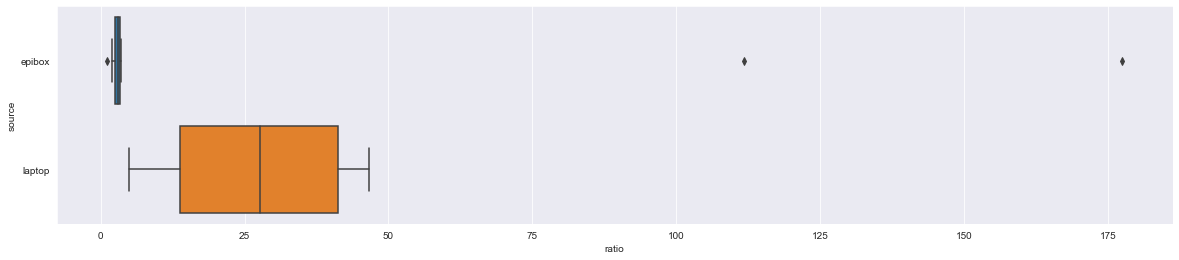

In [154]:
plt.figure(figsize=(20,4))
sns.boxplot(data=table_all, x='ratio', y='source')

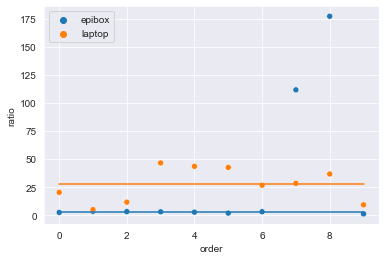

In [142]:
sns.scatterplot(data=table_all, y='ratio', x='order', hue='source')
sns.lineplot(y=np.ones(len(table_ep))*np.median(table_ep['ratio']), x=np.arange(len(table_ep)))
sns.lineplot(y=np.ones(len(table_lp))*np.median(table_lp['ratio']), x=np.arange(len(table_lp)))
plt.savefig('laptopvsepibox.png')

<AxesSubplot:xlabel='ratio', ylabel='source'>

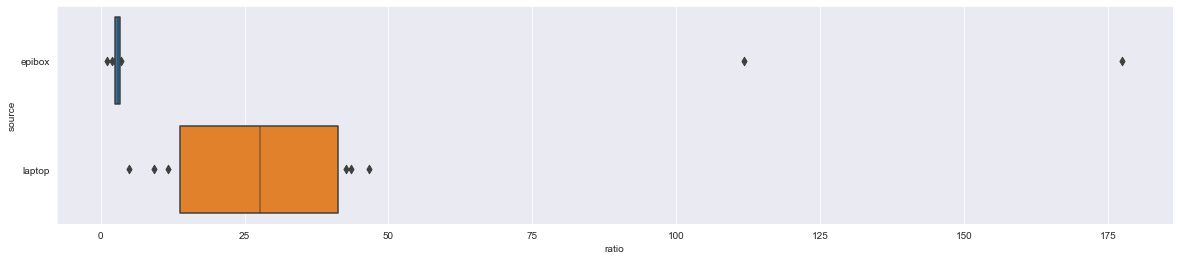

In [156]:
plt.figure(figsize=(20,4))
sns.boxenplot(data=table_all, x='ratio', y='source')

<AxesSubplot:xlabel='ratio', ylabel='source'>

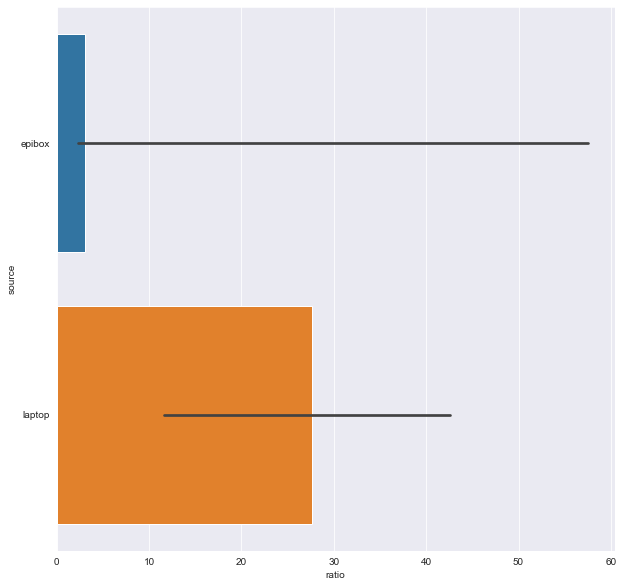

In [168]:
plt.figure(figsize=(10,10))
sns.barplot(data=table_all, x='ratio', y='source', estimator='median')

In [147]:
table_ep['ratio'].loc[table_ep['ratio']<100]

30    2.425532
31    3.441095
32    3.235561
33    3.005603
34    2.719714
35    1.878078
36    3.112227
40    1.136878
Name: ratio, dtype: float64

In [148]:
1/3

0.3333333333333333

In [149]:
2/(3)

0.6666666666666666